## Naive Bayes

In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB



from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics 


import warnings
warnings.filterwarnings("ignore")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


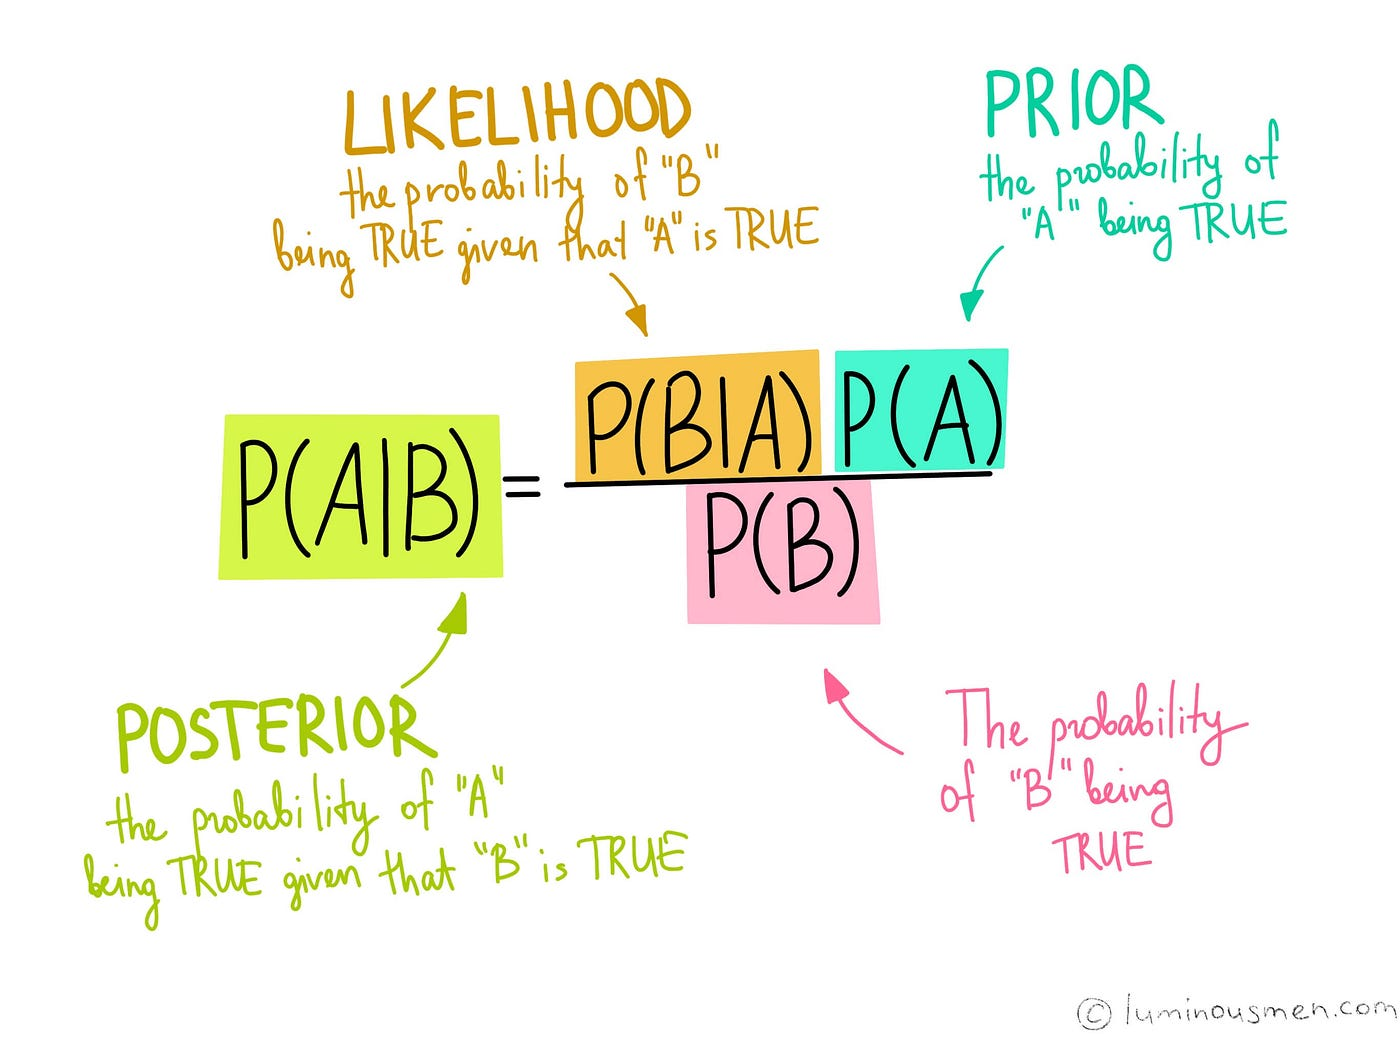

#### Naive Bayes can be used for both numerical and categorical features. However, it treats numerical features and categorical features differently.

The "naive" assumption in Naive Bayes refers to the assumption of feature independence. It assumes that the features (variables) in the dataset are conditionally independent of each other given the class label.

This means that the presence or absence of one feature does not affect the presence or absence of other features.

### Naive bayes variants 


#### Gaussian Naive Bayes:

Gaussian Naive Bayes is used when the features are continuous and assumed to follow a Gaussian (normal) distribution.
It is appropriate for numerical features, such as measurements, where the assumption of a normal distribution holds reasonably well.

Gaussian Naive Bayes estimates the mean and standard deviation of each feature for each class and uses them to calculate the conditional probabilities.

It is important to note that Gaussian Naive Bayes assumes that the features are conditionally independent given the class label.

#### Multinomial Naive Bayes:

Multinomial Naive Bayes is commonly used for text classification tasks, where the features are discrete or count-based, such as word frequencies or presence/absence of words.

It assumes that the features follow a multinomial distribution, hence the name.

This variant is suitable when dealing with categorical features, such as word occurrences or document frequencies.
The conditional probabilities are calculated using the frequencies or counts of each feature in each class.

#### Bernoulli naive Bayes:

In the multivariate Bernoulli event model, features are independent Booleans (binary variables) describing inputs. Like the multinomial model, this model is popular for document classification tasks,
The main advantage of this algorithm is that it only accepts features in the form of binary values such as:

True or False
Spam or Ham
Yes or No
0 or 1


About our Data:

## Prepare a classification model using Naive Bayes for salary data 

### Reading the input csv file for the train and test data

In [3]:
df_test = pd.read_csv('SalaryData_Test.csv')
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
df_train = pd.read_csv('SalaryData_Train.csv')
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


*  The goal of the classification model is to predict the salary category (<=50K or >50K) based on the independent features (age, workclass, education, etc.)

### Checking for the null values and the data types of the features


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


### Coverting the catergorical features into numerical features through Label encoding, for train data

Label encoding is a technique used to convert categorical variables into numerical representations. It assigns a unique numerical label to each unique category in a column.

By applying the LabelEncoder() function from the scikit-learn library and using the fit_transform() method, each column in the df_train DataFrame will be transformed into numerical labels.

In [7]:
df_train = df_train.apply(LabelEncoder().fit_transform)
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


### Coverting the catergorical features into numerical features through Label encoding, for test data

In [8]:
df_test = df_test.apply(LabelEncoder().fit_transform)
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


### Correlation

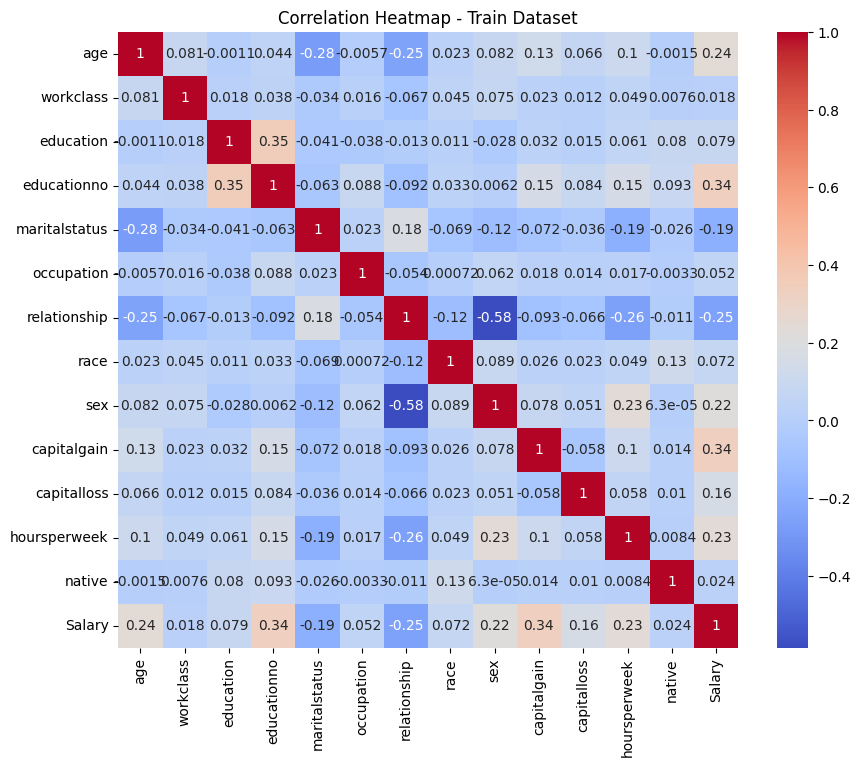

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix_train = df_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_train, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Train Dataset')
plt.show()

If a block is too light in color it has very good correlation in positive correlation and block is dark then it has negative correlation

### Extracting the independent and dependent variables from the dataset in the train dataset

In [10]:
X_train= df_train.drop(['education','relationship','native','maritalstatus','sex','race'],axis=1).values
Y_train= df_train['Salary'].values
print(np.unique(Y_train))
X_train

[0 1]


array([[22,  5, 12, ...,  0, 39,  0],
       [33,  4, 12, ...,  0, 12,  0],
       [21,  2,  8, ...,  0, 39,  0],
       ...,
       [41,  2,  8, ...,  0, 39,  0],
       [ 5,  2,  8, ...,  0, 19,  0],
       [35,  3,  8, ...,  0, 39,  1]])

### Extracting the independent and dependent variables from the dataset in the test dataset

In [11]:
X_test= df_test.drop(['education','relationship','native','maritalstatus','sex','race'],axis=1).values
Y_test= df_test['Salary'].values
print(np.unique(Y_test))
X_test

[0 1]


array([[ 8,  2,  6, ...,  0, 39,  0],
       [21,  2,  8, ...,  0, 49,  0],
       [11,  1, 11, ...,  0, 39,  1],
       ...,
       [21,  2, 12, ...,  0, 49,  0],
       [27,  2, 12, ...,  0, 39,  0],
       [18,  3, 12, ...,  0, 59,  1]])

## Constructing a Gaussian Naive bayes model and fitting on the train data

In [12]:
gnb = GB() 
gnb.fit(X_train, Y_train)   ##gnb was trained using the fit() 

GaussianNB()

#### Accuracy score on the train dataset

In [13]:
gnb.score(X_train, Y_train)

1.0

#### Making predictions on the testing data set

In [15]:
y_pred = gnb.predict(X_test)  ##to predict the target or label values for new input data.

In [17]:
accuracy_test = np.mean(y_pred== Y_test)  ##the accuracy of the model's predictions by comparing the predicted labels (y_pred) with the true labels (Y_test)
accuracy_test                             

1.0

### Comparing actual response values (y_test) with predicted response values (y_pred)

In [18]:
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(Y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 100.0


## Constructing a Multinomial Naive Bayes and test the accuracy of the train dataset

In [28]:
classifier_mb = MB()
classifier_mb.fit(X_train, Y_train)

MultinomialNB()

In [29]:
classifier_mb.score(X_train, Y_train)

0.7800802360664434

In [33]:
predicted_result = classifier_mb.predict(X_test)
predicted_result

array([0, 0, 0, ..., 0, 1, 0])

In [32]:
accuracy_test2 = np.mean(predicted_result== Y_test)  
accuracy_test2

0.7820053120849934

## Consolidating

In [34]:
t={'model':['Gaussian NB','Multinomial NB'],
  'accuracy':[accuracy_test,accuracy_test_1]
  }
t=pd.DataFrame(t)
t

,model,accuracy
0,Gaussian NB,1.000000
1,Multinomial NB,0.782005


### Conclusion:

From the above models, it is clear that the Gaussian naive bayes model gives a higher accuracy in classifying the salary data